# Lab 6 - Sampling and SMOTE
### SENG 474/503
### February 3rd, 2023
### TA: Jonas Buro

# Sampling
Sampling is the process of selecting a subset of data from a larger dataset. In order to learn a model which can generalize well, it is important to ensure that the training data is well balanced. That is, we don't want the training data to be heavily skewed towards a particular class, as it may introduce bias. If the data's classes are close to uniformly distributed, then random sampling is the preferred method of sampling. However, if the data is imbalanced (one class much more prevalent than another), then other sampling methods should be used.

### Sampling from a uniform distribution over [0,1)

In [1]:
import numpy as np
np.random.sample()

0.021911363576603393

### Sampling from the interval [l,h)

In [2]:
l = 3
h = 7
(h-l) * np.random.sample() + l

4.120669457349495

### Sampling multiple points

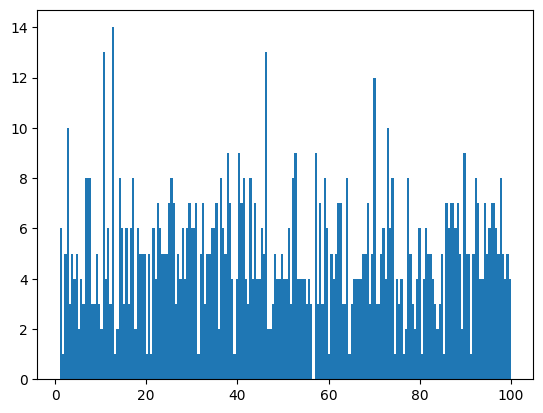

In [3]:
import matplotlib.pyplot as plt
np.random.seed(0)

n = 1000
l = 1
h = 100
samples = (h-l) * np.random.sample(n) + l           # Vectorization

plt.hist(samples,bins = 200)                        # Plot histogram into 200 bins
plt.show()

Alternatively, you can use numpy's np.random.rand() function to the same effect:

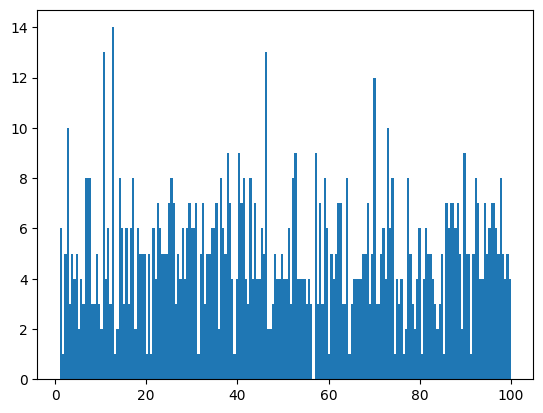

In [4]:
np.random.seed(0)

h = 100
l = 1
samples = (h-l) * np.random.rand(1000) + l

plt.hist(samples,bins = 200)                        # Plot histogram into 200 bins
plt.show()

### Sampling from standard normal distribution

<AxesSubplot: ylabel='Density'>

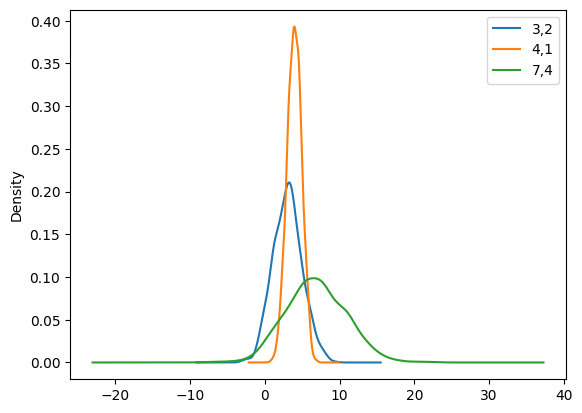

In [5]:
# Standard normal distribution
import pandas as pd

n = 1000    
#                            mean, std, samples
samples_1 = np.random.normal(3,2,1000)
samples_2 = np.random.normal(4,1,1000)
samples_3 = np.random.normal(7,4,1000)

df = pd.DataFrame({'3,2':samples_1, '4,1':samples_2, '7,4':samples_3})

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.density.html
df.plot.density()

### Sampling from beta distribution
$f(x;\alpha,\beta) = \frac{1}{B(\alpha,\beta)}x^{\alpha - 1}(1-x) ^{\beta -1}$

Where the normalization $B$ is the Beta function:

$B(\alpha, \beta) = \int_{0}^{1} t^{\alpha-1}(1-t)^{\beta - 1}dt$.


<AxesSubplot: ylabel='Density'>

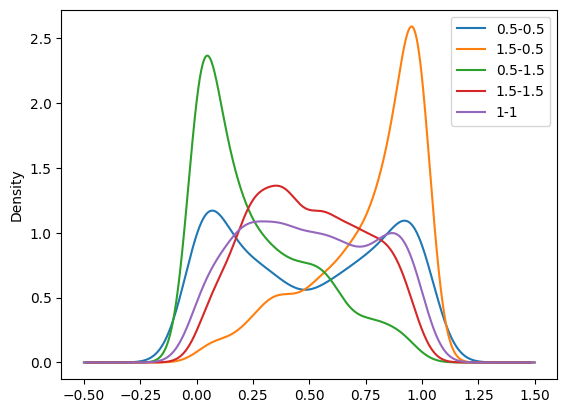

In [6]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html
beta_samples_1 = np.random.beta(0.5,0.5,1000)
beta_samples_2 = np.random.beta(1.5,0.5,1000)
beta_samples_3 = np.random.beta(0.5,1.5,1000)
beta_samples_4 = np.random.beta(1.5,1.5,1000)
beta_samples_5 = np.random.beta(1,1,1000)

dfBeta = pd.DataFrame({'0.5-0.5':beta_samples_1, '1.5-0.5':beta_samples_2 
                       , '0.5-1.5': beta_samples_3 , '1.5-1.5': beta_samples_4, '1-1': beta_samples_5})
dfBeta.plot.density()

### Sampling from binomial distribution
$P(N) = {n \choose N} p^N (1-p)^{n-N}$

<AxesSubplot: ylabel='Frequency'>

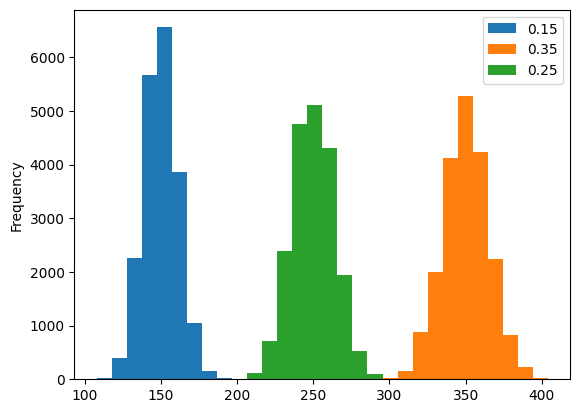

In [7]:
n = 1000
binom_samples_1 = np.random.binomial(n,0.15,20000)
binom_samples_2 = np.random.binomial(n,0.35,20000)
binom_samples_3 = np.random.binomial(n,0.25,20000)
dfBinom = pd.DataFrame({'0.15': binom_samples_1 , '0.35': binom_samples_2 ,'0.25':binom_samples_3})
# dfBinom.plot.density()
dfBinom.plot.hist(bins = 30)

### Sampling from other distributions
numpy.random has support for many other probability distributions, including dirichlet, chisquare, exponential, gamma, and geometric distributions. Check out the documentation for more info.

### Sampling from Discrete Collections

In [8]:
low = 3
high = 11
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
samples = np.random.randint(low,high,(10,2))
print(samples.shape)
print(samples)

(10, 2)
[[ 3 10]
 [10  5]
 [ 6  3]
 [ 8 10]
 [ 3  6]
 [ 3  3]
 [ 3  6]
 [ 5  9]
 [ 6  6]
 [ 7  7]]


We can sample from a discrete set by using <b>numpy.random.choice()</b>

In [9]:
# Generate a nparray of integers
l = np.arange(1,100,1)   # start, stop, step
n = 20
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
np.random.choice(l, size=n,replace=False) 

array([29, 91, 63, 36, 44, 38, 71, 28, 80,  5, 55, 70, 35, 75,  8, 99, 93,
       67, 77, 81])

### Sampling from non-uniform distributions

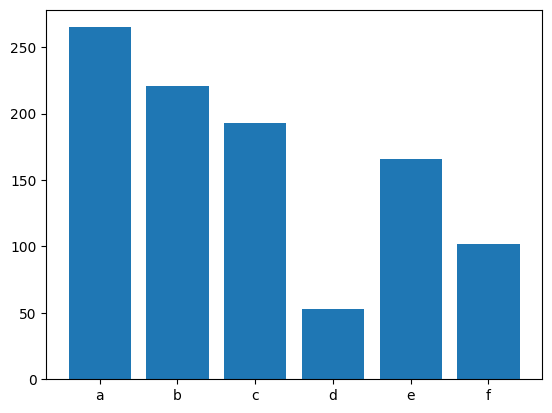

In [10]:
# create probability distribution p, entries must sum to 1
p = [0.3, 0.2, 0.2, 0.05, 0.15, 0.1]
n = 1000
chars = ['a', 'b', 'c', 'd', 'e', 'f']
chars_samp = np.random.choice(chars, size=n, p=p)
#https://numpy.org/doc/stable/reference/generated/numpy.unique.html 
label, counts = np.unique(chars_samp, return_counts=True)
plt.bar(label, counts)
plt.show()

### Random Variables
Let's use a dice game for illustration.
Roll two dice, take the sum. 

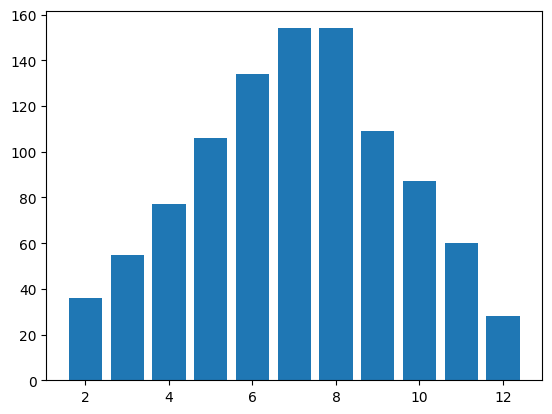

In [12]:
dice = [1,2,3,4,5,6]
n = 1000
roll_1 = np.random.choice(dice, size=n) # fair dice
roll_2 = np.random.choice(dice, size=n) # fair dice
sum = roll_1 + roll_2
label, counts = np.unique(sum, return_counts=True)
plt.bar(label, counts)
plt.show()

## Data Sampling

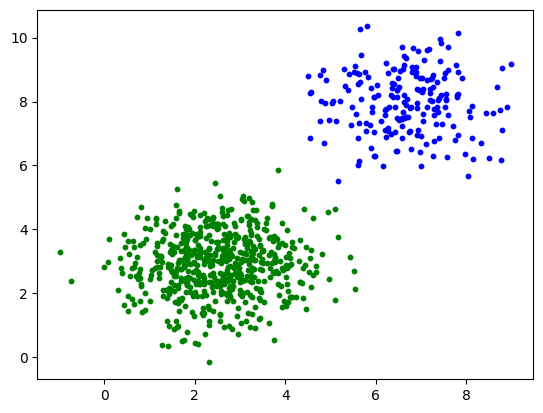

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
num_samples = [600,200]
samples,labels = make_blobs(n_samples=num_samples, 
                             centers=([2.5, 3], [6.7, 7.9]))

colours = ('green', 'blue')

fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=10)

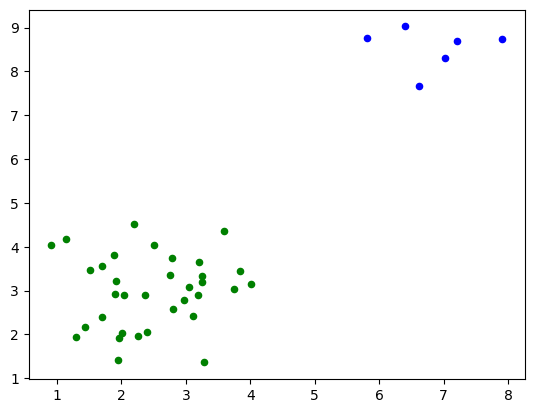

In [ ]:
idx = np.arange(len(samples))
s = np.random.choice(idx, size=int(len(samples)/20), replace=False)
sampled_points = samples[s]
sampled_point_labels = np.array(labels[s])
colours = ('green', 'blue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(sampled_points[sampled_point_labels==n_class][:, 0], sampled_points[sampled_point_labels==n_class][:, 1]
               ,c=colours[n_class],s=20)

# Handling imbalanced data
* It happens when the observation of one class is much higher or lower than the other class
    * Anomally Detection, Fraud Detection, etc
* Standard ML models have a bias towards the majority class, and they tend to ignore the minority class.
* Multiple techniques exist, we will look at an <i>over-sampling</i> technique

## SMOTE (Synthetic Minority Over-sampling Technique)
* SMOTE first selects a minority class instance 'a' at random and finds its K-Nearest minority class neighbors. The synthetic instance is then created by choosing one of the K-nearest Neighbors 'b' at random and connecting 'a' and 'b' to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances: 'a' and 'b'.
 (Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.)
* SMOTE paper: https://arxiv.org/pdf/1106.1813.pdf
* Sci-kit learn SMOTE installation instructions: https://github.com/scikit-learn-contrib/imbalanced-learn

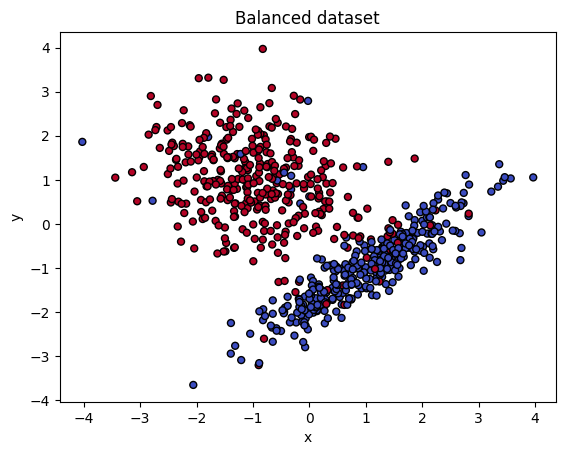

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

seed = 100

# create balanced dataset
X1, Y1 = make_classification(n_samples=700, n_features=2, n_redundant=0,
                            n_informative=2, n_clusters_per_class=1,
                            class_sep=1.0, flip_y=0.06, random_state=seed)

plt.title('Balanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()
# concatenate the features and labels into one dataframe
df = pd.concat([pd.DataFrame(X1), pd.DataFrame(Y1)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
# save the dataset
df.to_csv('df_base.csv', index=False, encoding='utf-8')

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 

def train_SVM(df):
    # select the feature columns
    X = df.loc[:, df.columns != 'label']
    # select the label column
    y = df.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

    # train an SVM with linear kernel
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    return clf,X_test,y_test


def plot_svm_boundary(clf, df, title):
   _, ax = plt.subplots()
   X0, X1 = df.iloc[:, 0], df.iloc[:, 1]

   x_min, x_max = X0.min() - 1, X0.max() + 1
   y_min, y_max = X1.min() - 1, X1.max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   _ = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

   ax.scatter(X0, X1, c=df.label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
   ax.set_ylabel('y')
   ax.set_xlabel('x')
   ax.set_title(title)
   plt.show()


[[97 11]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       108
           1       0.90      0.95      0.92       102

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.93      0.92      0.92       210



c:\Users\Jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


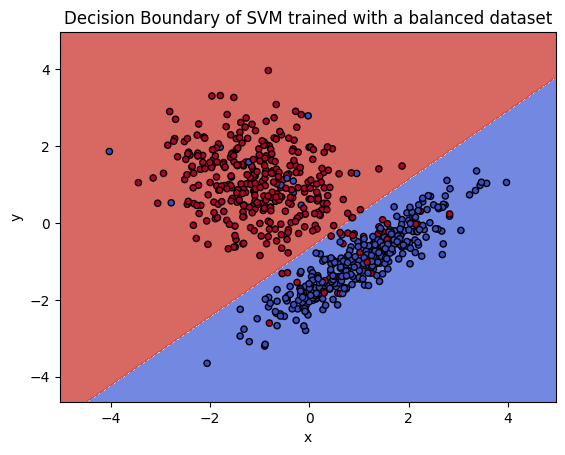

In [17]:
df = pd.read_csv('df_base.csv', encoding='utf-8', engine='python')
clf, X_test, y_test = train_SVM(df)
prediction = clf.predict(X_test)
print(confusion_matrix(prediction,y_test))
print(classification_report(prediction,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with a balanced dataset')

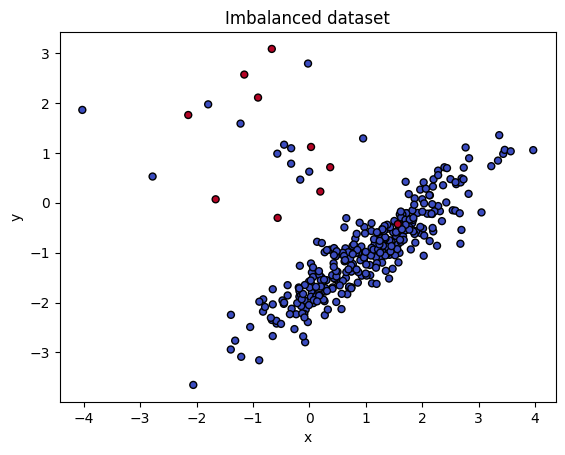

In [ ]:
import imblearn
from imblearn.datasets import make_imbalance
X_res , y_res = make_imbalance(X1, Y1, sampling_strategy={0: 340, 1: 10}, random_state=seed)
plt.title('Imbalanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()


df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_imbalanced.csv', index=False, encoding='utf-8')

[[102   3]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.00      0.00      0.00         0

    accuracy                           0.97       105
   macro avg       0.50      0.49      0.49       105
weighted avg       1.00      0.97      0.99       105



c:\Users\Jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

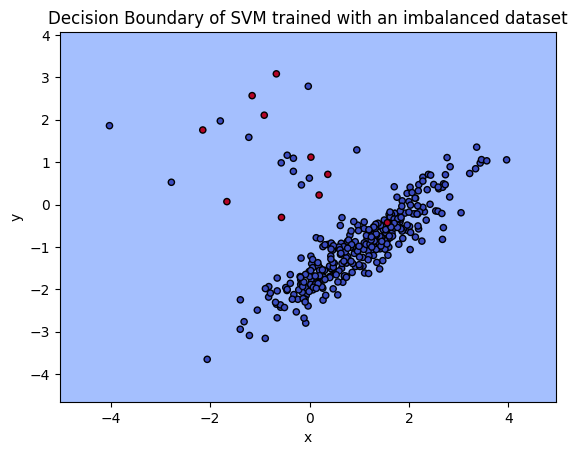

In [ ]:
df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
clf,X_test,y_test = train_SVM(df)
prediction = clf.predict(X_test)
print(confusion_matrix(prediction,y_test))
print(classification_report(prediction,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with an imbalanced dataset')

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


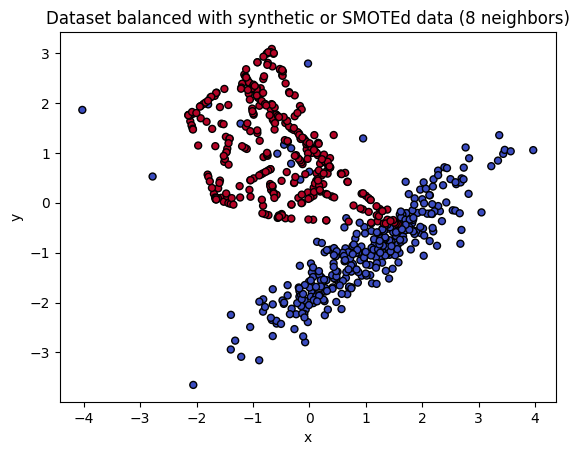

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 8

df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
X = df.loc[:, df.columns != 'label']
y = df.label
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
print(type(X_res))
X_res1 = np.asarray(X_res)
print(type(X_res1))
y_res1 = np.asarray(y_res)
plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res1[:, 0], X_res1[:, 1], marker='o', c=y_res1, s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

[[99  0]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       1.00      0.50      0.67         6

    accuracy                           0.97       105
   macro avg       0.99      0.75      0.83       105
weighted avg       0.97      0.97      0.97       105



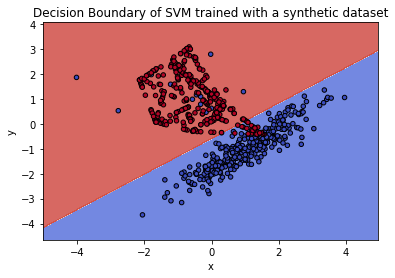

In [ ]:
df = pd.read_csv('df_smoted.csv', encoding='utf-8', engine='python')
clf,X_test_temp,y_test_temp = train_SVM(df)
prediction = clf.predict(X_test)
print(confusion_matrix(prediction,y_test))
print(classification_report(prediction,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with a synthetic dataset')